<a href="https://www.kaggle.com/code/dejokz/rock-paper-scissors?scriptVersionId=105873386" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
path =  '/kaggle/input/rockpaperscissors/rps-cv-images/'

In [2]:
import os

for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 1 images in '/kaggle/input/rockpaperscissors/rps-cv-images/'.
There are 0 directories and 712 images in '/kaggle/input/rockpaperscissors/rps-cv-images/paper'.
There are 0 directories and 726 images in '/kaggle/input/rockpaperscissors/rps-cv-images/rock'.
There are 0 directories and 750 images in '/kaggle/input/rockpaperscissors/rps-cv-images/scissors'.


In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path(path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['README_rpc-cv-images.txt' 'paper' 'rock' 'scissors']


In [4]:
class_names = class_names[1:]
print(class_names)

['paper' 'rock' 'scissors']


Let's take a look at our images

In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (200, 300, 3)


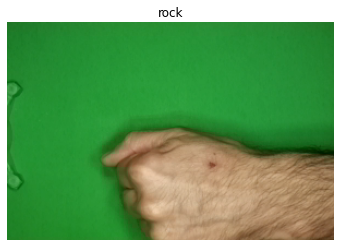

In [7]:
img = view_random_image(path, "rock")

In [7]:
img.shape

(200, 300, 3)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(validation_split=0.2, rescale=1/255, shear_range=0.2, zoom_range=0.2, rotation_range=20, fill_mode="nearest")

train_data = generator.flow_from_directory(path, batch_size=32, subset="training", target_size=(200, 300))
val_data = generator.flow_from_directory(path, batch_size=32, subset="validation", target_size=(200, 300))

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


**Tensorflow Model**

In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(200, 300, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding="valid"),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding="valid"),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding="valid"),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation="softmax")
])

2022-09-17 08:05:28.842239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 08:05:28.949244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 08:05:28.950025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 08:05:28.951199: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 296, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 148, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 146, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 73, 64)        0

In [12]:
model.compile(loss="categorical_crossentropy",
             optimizer=tf.optimizers.Adam(),
             metrics=['accuracy'])

In [13]:
history = model.fit(train_data, epochs=10, steps_per_epoch=20, validation_data = val_data, validation_steps=5, verbose=1)

2022-09-17 08:05:39.974783: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-09-17 08:05:42.744096: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 27s 909ms/step - loss: 1.8888 - accuracy: 0.3766 - val_loss: 1.0859 - val_accuracy: 0.4750
Epoch 2/10
20/20 [==============================] - 16s 792ms/step - loss: 0.9383 - accuracy: 0.5625 - val_loss: 0.7566 - val_accuracy: 0.6687
Epoch 3/10
20/20 [==============================] - 15s 753ms/step - loss: 0.7745 - accuracy: 0.6957 - val_loss: 0.7476 - val_accuracy: 0.6812
Epoch 4/10
20/20 [==============================] - 14s 693ms/step - loss: 0.7367 - accuracy: 0.7156 - val_loss: 0.6345 - val_accuracy: 0.7937
Epoch 5/10
20/20 [==============================] - 13s 662ms/step - loss: 0.6796 - accuracy: 0.7203 - val_loss: 0.6604 - val_accuracy: 0.7812
Epoch 6/10
20/20 [==============================] - 13s 667ms/step - loss: 0.5820 - accuracy: 0.7812 - val_loss: 0.6017 - val_accuracy: 0.8125
Epoch 7/10
20/20 [==============================] - 13s 666ms/step - loss: 0.5928 - accuracy: 0.7655 - val_loss: 0.4670 - val_accuracy: 0.8313
Epoch 8/10

In [14]:
from keras.preprocessing import image
uploaded = "../input/sample-image/img_kaggle.jpg"
img = image.load_img(uploaded, target_size=(200,300))

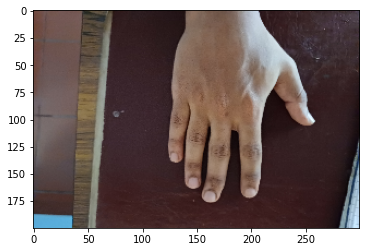

In [15]:
imgplt = plt.imshow(img)

In [16]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes)

[[1. 0. 0.]]


In [17]:
if classes[0][0] == 1:
    print("Paper")
elif classes[0][1] == 1:
    print('Rock')
else:
    print("Scissors")

Paper
